In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras

Construction du dataset avec les nom des features et convertir en csv.

In [27]:
with open('feature_name.txt', 'r') as f:
    column_names = f.read().strip().split(',')  # Ou .splitlines() si chaque nom est sur une ligne différente
df = pd.read_csv('kddcup.data_10_percent.gz', compression='gzip', header=None, names=column_names)

In [29]:
df['target']

0         normal.
1         normal.
2         normal.
3         normal.
4         normal.
           ...   
494016    normal.
494017    normal.
494018    normal.
494019    normal.
494020    normal.
Name: target, Length: 494021, dtype: object

In [1032]:
df['target'] = df['target'].astype(str)
print(df['target'].dtype)
print(type(list(dictionnaire.keys())[0]))

object
<class 'str'>


Open attack_train and create dictionary 

In [1035]:
dictionnaire = {}
with open('attack_type.txt', 'r') as f:
    for line in f:
        key, value = line.strip().split()
        dictionnaire[key] = value
#print(dictionnaire)

Add attack type on target column based on attack 

In [1038]:
for key in dictionnaire.keys():
    df.loc[df['target'] == key+'.', 'target'] = dictionnaire[key]

Convert it into csv file for future use 

In [1041]:
df.to_csv('dataset_finale.csv', index=False)

In [1042]:
df['target'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

Functions to loads the dataset and split it into feature and label

In [5]:
def load_dataset_and_clean(path):
    df = pd.read_csv(path)
    label = df['target']
    df = df.drop('target', axis=1)  
    df = df.dropna()
    
    return df,label
   

Drop tout les NaN dans le dataset

In [31]:
Features, Label = load_dataset_and_clean('dataset_finale.csv')

In [8]:
Label

0         normal
1         normal
2         normal
3         normal
4         normal
           ...  
494016    normal
494017    normal
494018    normal
494019    normal
494020    normal
Name: target, Length: 494021, dtype: object

Function to display shape and number of class

In [12]:
def information_about_dset(X, y):
    shape = X.shape
    nb_class = len(y.unique())
    return shape, nb_class

Call the function and we have 5 class 

In [15]:
shape, nb = information_about_dset(Features,Label)
print(f"shape {shape} number : {nb}")

shape (494021, 41) number : 5


In [17]:
#for col in Features.columns:
   #print(Features[col].unique())

Function to split feature into num and categorical 

In [20]:
def split_into_cat_and_num(X):
    df_numeric = X.select_dtypes(include=['number'])

    # Séparer les colonnes catégoriques (objets, strings)
    df_categorical = X.select_dtypes(include=['object'])

    return df_numeric, df_categorical

In [22]:
Numerical, Categorical = split_into_cat_and_num(Features)

Plot bar plot for categorical features 

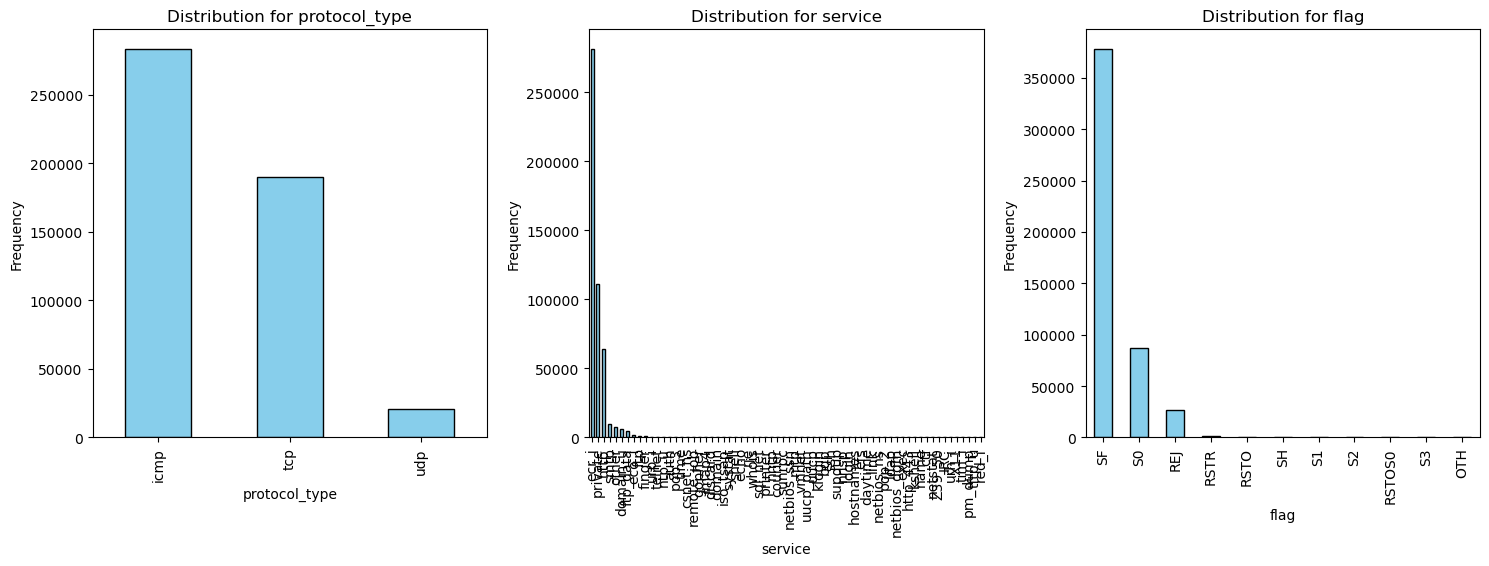

In [33]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(Categorical, 1):
    plt.subplot(2, 3, i) 
    df[col].value_counts().plot.bar(color='skyblue', edgecolor='black')
    plt.title(f'Distribution for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

There is not to match categorical in protocol type column so we'll keep this column

There is to macth categorical and data are not well distributed in service and flag. So  we'll drop them

In [37]:
Categorical_re =  Categorical.drop(['service', 'flag'], axis=1)  

In [39]:
Categorical_re

,protocol_type
0,tcp
1,tcp
2,tcp
3,tcp
4,tcp
...,...
494016,tcp
494017,tcp
494018,tcp
494019,tcp


NUMERICAL FEATURES ENGEENERING 

Numerical_corr 

In [478]:
def plot_correlation_matrix(X):
    Numerical_corr = X.corr()
    plt.figure(figsize=(20, 15))
    sns.heatmap(Numerical_corr, annot=True, cmap='coolwarm', cbar=True)
    plt.title('Correlation Matrix')
    plt.show()
    return 1

As you can see there is a lot of strong correlation between features > 0.9

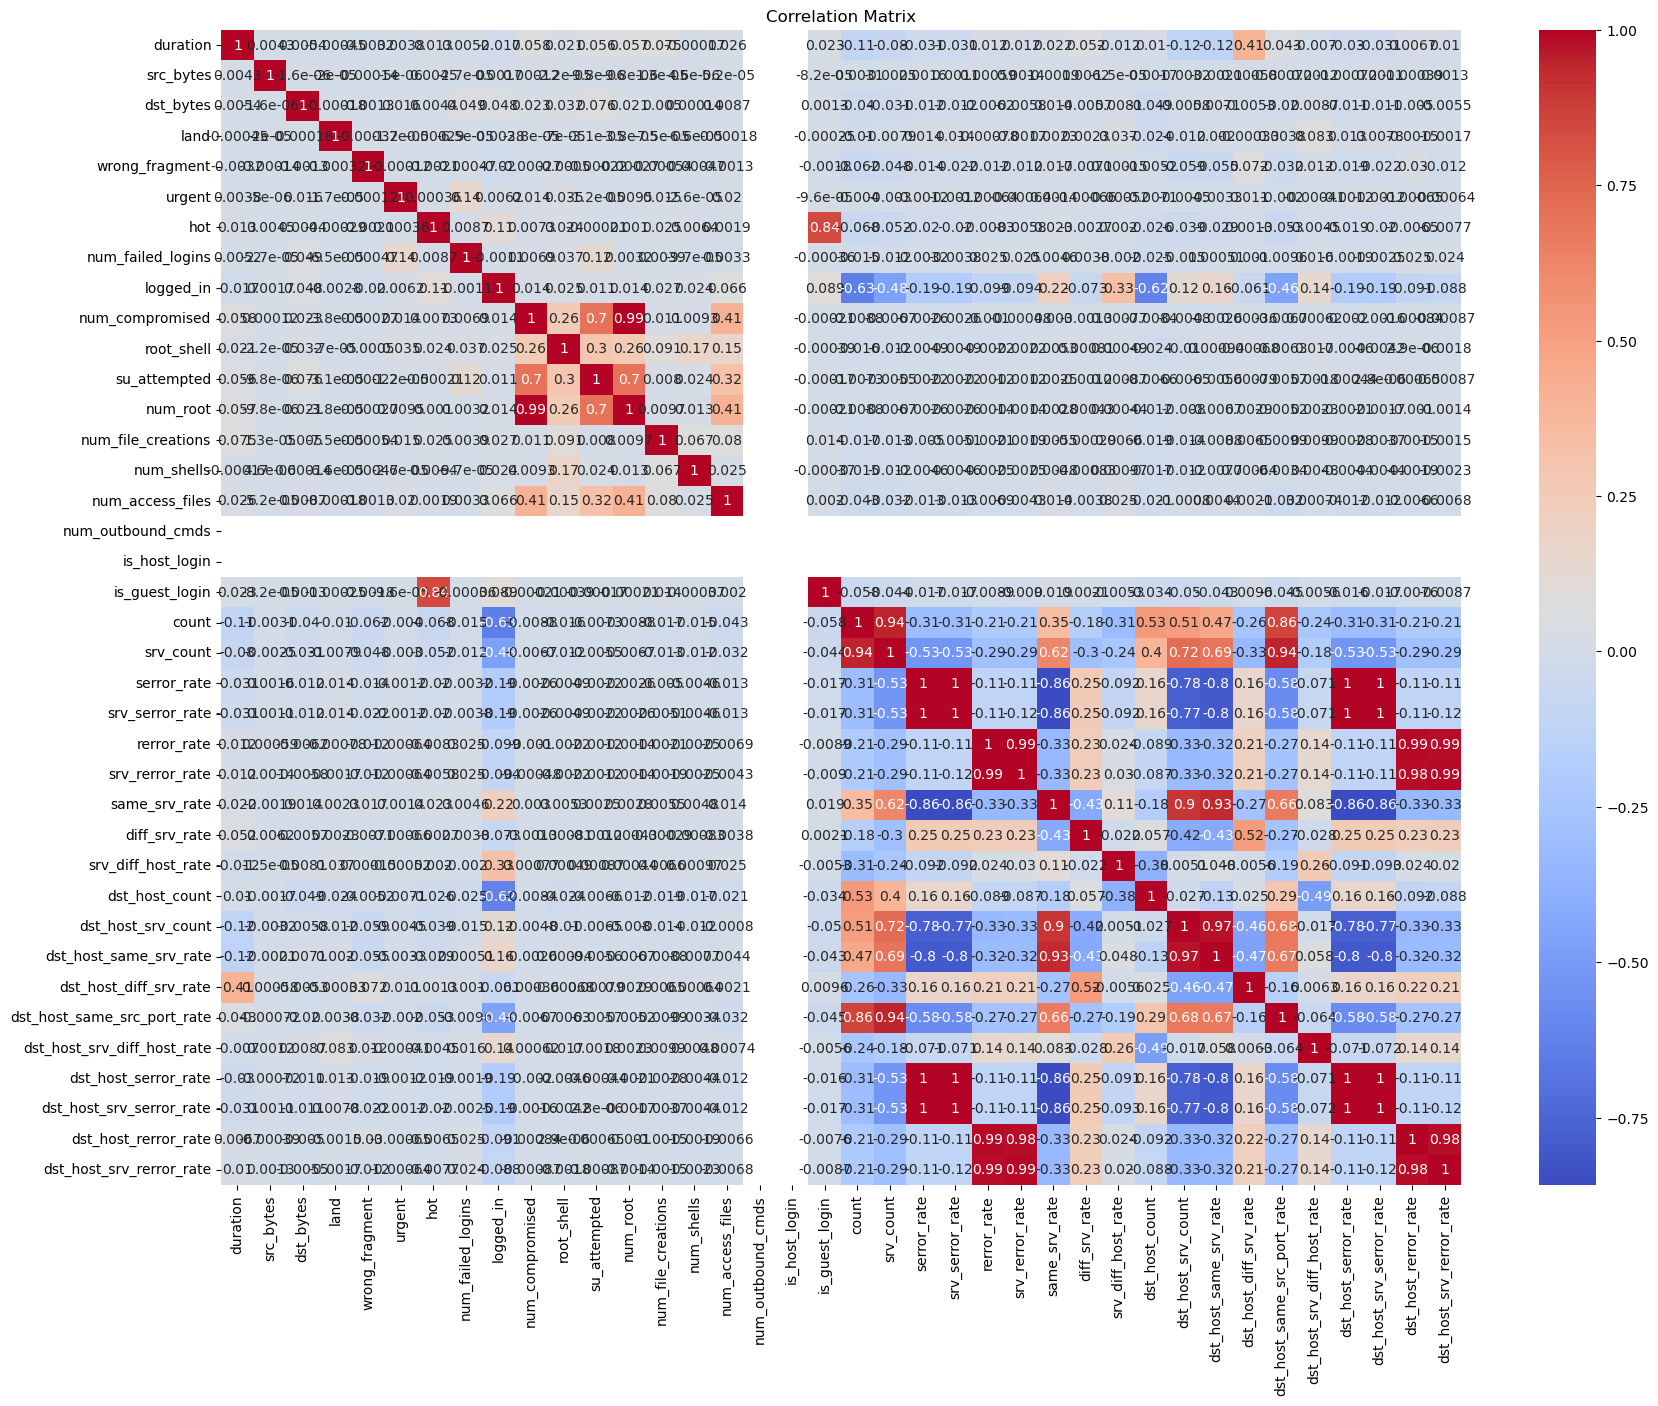

In [480]:
plot_correlation_matrix(Numerical)

Here will drop columns with strong correlation

In [43]:
Numerical_corr = Numerical.corr().abs()

In [44]:
# Upper tringle matrix
upper_tri = Numerical_corr.where(np.triu(np.ones(Numerical_corr.shape), k=1).astype(bool))
treshold = 0.9
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > treshold)]

In [45]:
# Drop selected columns
Numerical_re = Numerical.drop(columns=to_drop)

As you can see, we kept only usefull features 

In [50]:
plot_correlation_matrix(Numerical_re)

NameError: name 'plot_correlation_matrix' is not defined

PREPROCESS DATAS

Encoding Categorical feature. 

Encoding Labels features

Fusion Cat and Num and Scaled them

In [52]:
Categorical_re

,protocol_type
0,tcp
1,tcp
2,tcp
3,tcp
4,tcp
...,...
494016,tcp
494017,tcp
494018,tcp
494019,tcp


In [54]:
Label = np.array(Label)
Label = Label.reshape(Label.shape[0],1)

In [56]:
Numerical_re

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate
0,0,181,5450,0,0,0,0,0,1,0,...,8,0.00,0.0,1.0,0.0,0.00,9,9,0.0,0.00
1,0,239,486,0,0,0,0,0,1,0,...,8,0.00,0.0,1.0,0.0,0.00,19,19,0.0,0.00
2,0,235,1337,0,0,0,0,0,1,0,...,8,0.00,0.0,1.0,0.0,0.00,29,29,0.0,0.00
3,0,219,1337,0,0,0,0,0,1,0,...,6,0.00,0.0,1.0,0.0,0.00,39,39,0.0,0.00
4,0,217,2032,0,0,0,0,0,1,0,...,6,0.00,0.0,1.0,0.0,0.00,49,49,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,4,0.00,0.0,1.0,0.0,0.40,86,255,0.0,0.05
494017,0,282,2286,0,0,0,0,0,1,0,...,6,0.00,0.0,1.0,0.0,0.00,6,255,0.0,0.05
494018,0,203,1200,0,0,0,0,0,1,0,...,6,0.17,0.0,1.0,0.0,0.17,16,255,0.0,0.05
494019,0,291,1200,0,0,0,0,0,1,0,...,6,0.00,0.0,1.0,0.0,0.17,26,255,0.0,0.05


In [58]:
def Encode_Scale(Num_feat, Cat_feat, Label):
    #Encoding Categorical Features
    # Initialiser OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, drop='first') 
    # Appliquer OneHotEncoder aux colonnes catégorielles
    encoded_data = encoder.fit_transform(Cat_feat)
    # Convertir le résultat en DataFrame
    cat_encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

    #Encoding Labels 
    le = LabelEncoder()
    Label_e = pd.DataFrame(Label, columns=['Target'])
    Label_e['Target_enc'] = le.fit_transform(Label_e['Target'])
    Label_e = Label_e.drop(columns=['Target'])

    #Scale Numerical  Features
    Scaler = StandardScaler()
    Numerical_re_scaled = Scaler.fit_transform(Numerical_re)
    Numerical_re_df = pd.DataFrame(Numerical_re_scaled, columns=Numerical_re.columns)

    # Concaténer verticalement
    Final_Features = pd.concat([Numerical_re_df, cat_encoded_df], axis=1,ignore_index=True)  
    #pd.concat([Numerical_re_df, cat_encoded_df], axis=1,ignore_index=True)
    return Final_Features, Label_e
    

In [60]:
Final_feat, final_lab = Encode_Scale(Numerical_re, Categorical_re, Label )

In [61]:
final_lab['Target_enc'].unique()

array([1, 4, 0, 3, 2])

In [64]:
Final_features = np.array(Final_feat)

In [66]:
final_labels = np.array(final_lab)

SPLIT DATA SET INTO TRAIN SET AND TEST SET 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(Final_feat, final_labels, test_size=0.2, random_state=42)

In [72]:
y_train = y_train.reshape((y_train.shape[0],))

In [76]:
y_train.shape

(395216,)

MAKE OUR MODEL WITH TENSORFLOW

In [ ]:
!pip install tensorflow

In [972]:
model = keras.Sequential([
    keras.Input(shape=(30,)),  # 30 features en entrée
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # 5 classes en sortie
])

In [974]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [976]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,469 (25.27 KB)

 Trainable params: 6,469 (25.27 KB)

 Non-trainable params: 0 (0.00 B)

In [978]:
# training the model
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9937 - loss: 0.0411
Epoch 2/3
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9982 - loss: 0.0138
Epoch 3/3
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9984 - loss: 0.0059


In [980]:
# Evaluation du modele
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test loss:', "%0.2f" % test_loss)
print('Test accuracy:', "%0.2f" % test_acc)

3088/3088 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9984 - loss: 0.0048
Test loss: 0.01
Test accuracy: 1.00


In [988]:
# modele prédictif (softmax)
predict_proba = model.predict(X_test)
#print(predict_proba[min:max].round())
predictions = np.argmax(predict_proba, axis=1)
#print(predictions[min:max])
#print(y_test[min:max])

3088/3088 ━━━━━━━━━━━━━━━━━━━━ 3s 966us/step


(array([7.8363e+04, 0.0000e+00, 1.9467e+04, 0.0000e+00, 0.0000e+00,
        8.3600e+02, 0.0000e+00, 1.3500e+02, 0.0000e+00, 4.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

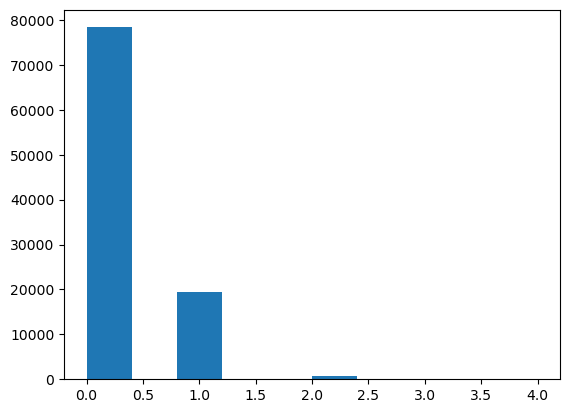

In [1003]:
prediction = pd.DataFrame(predictions)
plt.hist(prediction)

(array([7.8355e+04, 0.0000e+00, 1.9353e+04, 0.0000e+00, 0.0000e+00,
        8.5000e+02, 0.0000e+00, 2.3500e+02, 0.0000e+00, 1.2000e+01]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

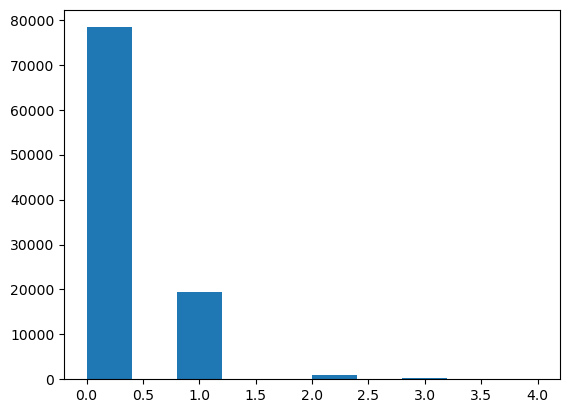

In [1008]:
plt.hist(y_test)

(array([3.13103e+05, 0.00000e+00, 7.79250e+04, 0.00000e+00, 0.00000e+00,
        3.25700e+03, 0.00000e+00, 8.91000e+02, 0.00000e+00, 4.00000e+01]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

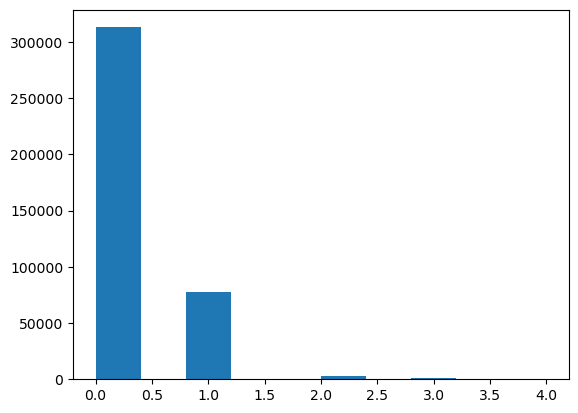

In [1018]:
plt.hist(y_train)